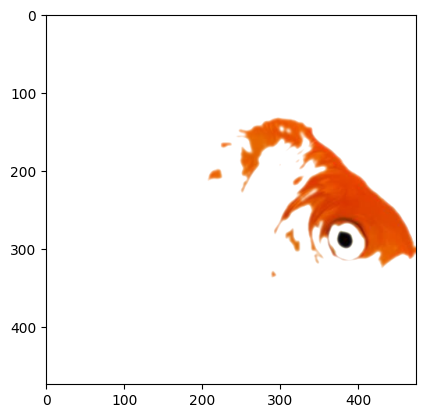

In [12]:
import numpy as np
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt

#abrindo a imagem
img = Image.open('peixe.jpg')

img_np = np.array(img)
(l, c, p) = img_np.shape

#convertendo a imagem para grayscale
img_grayscale = np.zeros(shape=(l, c), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        r = float(img_np[i, j, 0])
        g = float(img_np[i, j, 1])
        b = float(img_np[i, j, 2])
        
        img_grayscale[i, j] = 0.2126 * r + 0.7152 * g + 0.0722 * b

#convertendo a imagem para binário
for a in range(l):
    for b in range(c):
        if img_grayscale[a, b] > 127:
            img_grayscale[a, b] = 255 #setando como pixel branco
        else: img_grayscale[a, b] = 0 #setando como pixel preto
            
#invertendo a imagem            
img_not = np.invert(img_grayscale)

#ANTI- ALIAS --> BLUR + STRETCH
#BLUR:
img_cv_mask = cv.GaussianBlur(img_not,(0,0), sigmaX=2, sigmaY=2, borderType = cv.BORDER_DEFAULT)
#STRETCH LINEAR:
img_cv_mask = (2*(img_cv_mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)

#colocando a mascara no canal alpha
img = cv.cvtColor(img_np, cv.COLOR_BGR2BGRA)
img[:, :, 3] = img_cv_mask

cv.imwrite("teste_nBckgnd.png", img)
cv.imwrite("img_gray.jpg", img_grayscale)
cv.imwrite("img_not.jpg", img_not)
cv.imwrite("img_mask.jpg", img_cv_mask)
plt.imshow(img)